In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

from pathlib import Path

2023-02-28 20:58:59.763051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 20:58:59.911713: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-28 20:59:00.351197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/victor/miniconda3/envs/tf/lib/:/home/victor/miniconda3/envs/tf/lib/:/home/victor/miniconda3/envs/tf/lib/:/home/victor/miniconda3/envs/tf/lib/
2023-02-28 20:59:00.351260: W tensorflow/stream_executor/platfo

In [2]:
data_dir = Path('../all')
train_path = '../train.csv'

In [3]:
df_train = pd.read_csv(train_path)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [4]:
signs = list(df_train.sign.unique())
signs.sort()
signs

['TV',
 'after',
 'airplane',
 'all',
 'alligator',
 'animal',
 'another',
 'any',
 'apple',
 'arm',
 'aunt',
 'awake',
 'backyard',
 'bad',
 'balloon',
 'bath',
 'because',
 'bed',
 'bedroom',
 'bee',
 'before',
 'beside',
 'better',
 'bird',
 'black',
 'blow',
 'blue',
 'boat',
 'book',
 'boy',
 'brother',
 'brown',
 'bug',
 'bye',
 'callonphone',
 'can',
 'car',
 'carrot',
 'cat',
 'cereal',
 'chair',
 'cheek',
 'child',
 'chin',
 'chocolate',
 'clean',
 'close',
 'closet',
 'cloud',
 'clown',
 'cow',
 'cowboy',
 'cry',
 'cut',
 'cute',
 'dad',
 'dance',
 'dirty',
 'dog',
 'doll',
 'donkey',
 'down',
 'drawer',
 'drink',
 'drop',
 'dry',
 'dryer',
 'duck',
 'ear',
 'elephant',
 'empty',
 'every',
 'eye',
 'face',
 'fall',
 'farm',
 'fast',
 'feet',
 'find',
 'fine',
 'finger',
 'finish',
 'fireman',
 'first',
 'fish',
 'flag',
 'flower',
 'food',
 'for',
 'frenchfries',
 'frog',
 'garbage',
 'gift',
 'giraffe',
 'girl',
 'give',
 'glasswindow',
 'go',
 'goose',
 'grandma',
 'grandpa

# Animation

In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

dir = '..'
train = pd.read_csv(f'{dir}/train.csv')

In [6]:
def get_hand_points(hand):
    x = [[hand[0][0], hand[1][0], hand[2][0], hand[3][0], hand[4][0]], # Thumb
         [hand[5][0], hand[6][0], hand[7][0], hand[8][0]], # Index
         [hand[9][0], hand[10][0], hand[11][0], hand[12][0]], 
         [hand[13][0], hand[14][0], hand[15][0], hand[16][0]], 
         [hand[17][0], hand[18][0], hand[19][0], hand[20][0]], 
         [hand[0][0], hand[5][0], hand[9][0], hand[13][0], hand[17][0], hand[0][0]]]

    y = [[hand[0][1], hand[1][1], hand[2][1], hand[3][1], hand[4][1]],  #Thumb
         [hand[5][1], hand[6][1], hand[7][1], hand[8][1]], # Index
         [hand[9][1], hand[10][1], hand[11][1], hand[12][1]], 
         [hand[13][1], hand[14][1], hand[15][1], hand[16][1]], 
         [hand[17][1], hand[18][1], hand[19][1], hand[20][1]], 
         [hand[0][1], hand[5][1], hand[9][1], hand[13][1], hand[17][1], hand[0][1]]] 
    return x, y

def get_pose_points(pose):
    x = [[pose[8][0], pose[6][0], pose[5][0], pose[4][0], pose[0][0], pose[1][0], pose[2][0], pose[3][0], pose[7][0]], 
         [pose[10][0], pose[9][0]], 
         [pose[22][0], pose[16][0], pose[20][0], pose[18][0], pose[16][0], pose[14][0], pose[12][0], 
          pose[11][0], pose[13][0], pose[15][0], pose[17][0], pose[19][0], pose[15][0], pose[21][0]], 
         [pose[12][0], pose[24][0], pose[26][0], pose[28][0], pose[30][0], pose[32][0], pose[28][0]], 
         [pose[11][0], pose[23][0], pose[25][0], pose[27][0], pose[29][0], pose[31][0], pose[27][0]], 
         [pose[24][0], pose[23][0]]
        ]

    y = [[pose[8][1], pose[6][1], pose[5][1], pose[4][1], pose[0][1], pose[1][1], pose[2][1], pose[3][1], pose[7][1]], 
         [pose[10][1], pose[9][1]], 
         [pose[22][1], pose[16][1], pose[20][1], pose[18][1], pose[16][1], pose[14][1], pose[12][1], 
          pose[11][1], pose[13][1], pose[15][1], pose[17][1], pose[19][1], pose[15][1], pose[21][1]], 
         [pose[12][1], pose[24][1], pose[26][1], pose[28][1], pose[30][1], pose[32][1], pose[28][1]], 
         [pose[11][1], pose[23][1], pose[25][1], pose[27][1], pose[29][1], pose[31][1], pose[27][1]], 
         [pose[24][1], pose[23][1]]
        ]
    return x, y

In [7]:
def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / 543)
    data = data.values.reshape(n_frames, 543, len(data_columns))
    return data.astype(np.float32)

In [8]:
def animation_frame(f: int):
    frame = data[f]
    face = frame[0:468]
    left = frame[468:489]
    pose = frame[489:522]
    right = frame[522:543]
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
        

In [9]:
df_train.sign.unique()

array(['blow', 'wait', 'cloud', 'bird', 'owie', 'duck', 'minemy', 'lips',
       'flower', 'time', 'vacuum', 'apple', 'puzzle', 'mitten', 'there',
       'dry', 'shirt', 'owl', 'yellow', 'not', 'zipper', 'clean',
       'closet', 'quiet', 'have', 'brother', 'clown', 'cheek', 'cute',
       'store', 'shoe', 'wet', 'see', 'empty', 'fall', 'balloon',
       'frenchfries', 'finger', 'same', 'cry', 'hungry', 'orange', 'milk',
       'go', 'drawer', 'TV', 'another', 'giraffe', 'wake', 'bee', 'bad',
       'can', 'say', 'callonphone', 'finish', 'old', 'backyard', 'sick',
       'look', 'that', 'black', 'yourself', 'open', 'alligator', 'moon',
       'find', 'pizza', 'shhh', 'fast', 'jacket', 'scissors', 'now',
       'man', 'sticky', 'jump', 'sleep', 'sun', 'first', 'grass', 'uncle',
       'fish', 'cowboy', 'snow', 'dryer', 'green', 'bug', 'nap', 'feet',
       'yucky', 'morning', 'sad', 'face', 'penny', 'gift', 'night',
       'hair', 'who', 'think', 'brown', 'mad', 'bed', 'drink', 'stay',


train_landmark_files/37055/4181501206.parquet
data.shape=(26, 543, 3)
The sign being shown here is: pretty


2023-02-28 20:59:01.564408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-28 20:59:01.568204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-28 20:59:01.568353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-28 20:59:01.568770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

train_landmark_files/27610/2569524548.parquet
data.shape=(31, 543, 3)
The sign being shown here is: pretty


train_landmark_files/62590/1143824599.parquet
data.shape=(6, 543, 3)
The sign being shown here is: pretty


train_landmark_files/16069/2783860844.parquet
data.shape=(31, 543, 3)
The sign being shown here is: pretty


train_landmark_files/2044/3549914862.parquet
data.shape=(37, 543, 3)
The sign being shown here is: pretty


Done


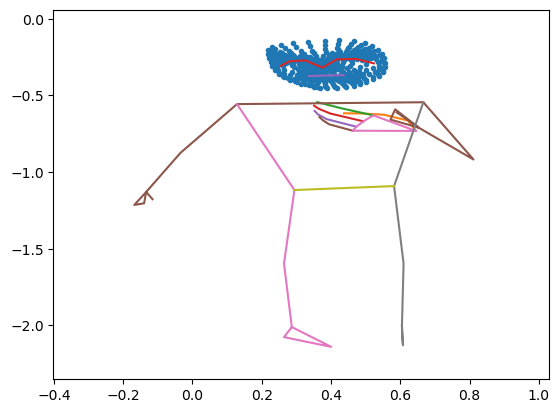

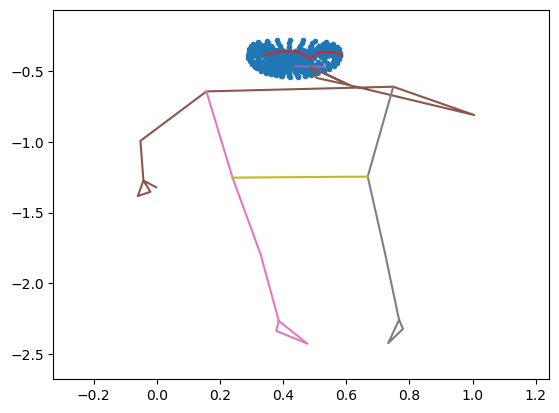

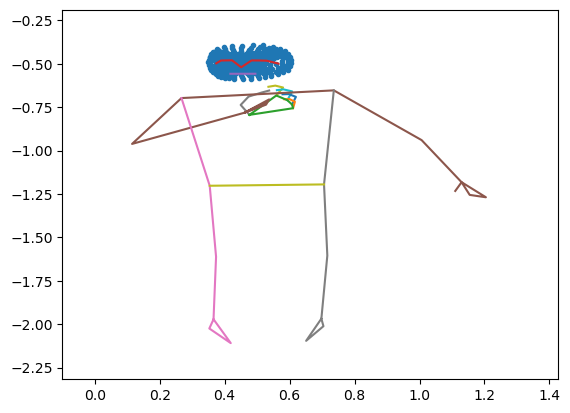

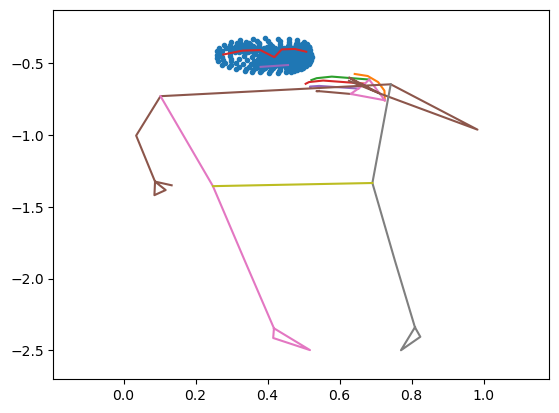

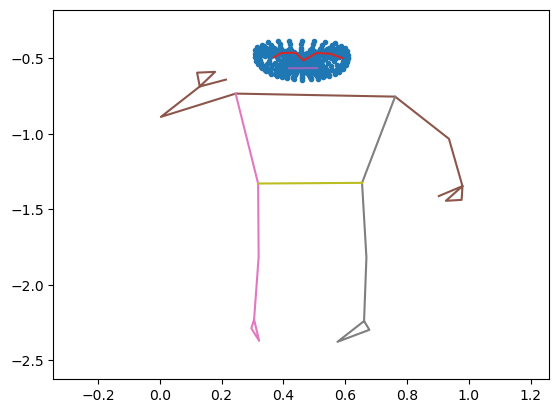

In [10]:
MAX_FRAMES = 5 # Will reduce to these number of frames (with 'nearest' method)
sign_name = np.random.choice(df_train.sign.unique())
subset = df_train[df_train.sign == sign_name]

animations = []
for path_to_sign in subset.sample(5)['path'].values:
    print(path_to_sign)
    data = load_relevant_data_subset(f'{dir}/{path_to_sign}')
    data[:,:,1] *= -1 # flip over
    print(f'{data.shape=}')
    print(f"The sign being shown here is: {train[train.path==f'{path_to_sign}'].sign.values[0]}")

    data = tf.image.resize(data, (MAX_FRAMES,543), method='nearest')
    ## These values set the limits on the graph to stabilize the video
    xmin = np.nanmin(data[:,:,0]) - 0.2
    xmax = np.nanmax(data[:,:,0]) + 0.2
    ymin = np.nanmin(data[:,:,1]) - 0.2
    ymax = np.nanmax(data[:,:,1]) + 0.2

    fig, ax = plt.subplots()
    l, = ax.plot([], [])
    animation = FuncAnimation(fig, func=animation_frame, frames=list(range(data.shape[0])))
    display(HTML(animation.to_html5_video()))

print('Done')